# Test FPTAS Pipeline

__date__ = 20240418

The purpose of this document is to demonstrate the FPTAS using the toy data we used together as well as real data.

##### Read toy data

In [212]:
toy_data = pd.read_csv(HOME + '/toy_example.csv', index_col=0)
display(toy_data)

,NUMBER,SCHOOL_ID,PROBABILITY,UTILITY,EU
50,50,191515,0.12,69.155323,8.298639
40,40,192110,0.11,82.508344,9.075918
30,30,446561,0.10,100.017743,10.001774
10,10,182670,0.06,277.898406,16.673904
0,0,460376,0.01,10000.052864,100.000529


##### Settings

In [213]:
eps = 0.01
K = 3
T = 0.9
m = 3
n = 3

##### Run FPTAS

For each iteration we have $F[n, m, u]$. When a utility for a given n,m is unachievable we mark it with 0.

In [214]:
data = fptas(prob=toy_data,
          n=n, 
          m=m, 
          T=T, 
          K=K, 
          eps=eps, 
          verbose = True)
display(data)

{(0, 0, 0): 0,
 (1, 1, 8.3): 0.12,
 (1, 1, 9.0): 0,
 (2, 1, 8.3): 0.12,
 (2, 1, 9.0): 0,
 (2, 1, 9.076666666666668): 0.11,
 (2, 1, 10.0): 0,
 (2, 2, 16.463333333333335): 0.2168,
 (2, 2, 17.0): 0,
 (3, 1, 8.3): 0.12,
 (3, 1, 9.0): 0,
 (3, 1, 9.076666666666668): 0.11,
 (3, 1, 10.0): 0,
 (3, 1, 10.003333333333334): 0.1,
 (3, 1, 11.0): 0,
 (3, 2, 16.463333333333335): 0.2168,
 (3, 2, 17.0): 0,
 (3, 2, 17.470000000000002): 0.20800000000000002,
 (3, 2, 18.0): 0,
 (3, 2, 18.17): 0.199,
 (3, 2, 19.0): 0,
 (3, 3, 25.64): 0.29512,
 (3, 3, 26.0): 0}


u        p         ru       err
n m                                         
1 1   8.298639  0.12000   8.300000  0.001361
2 1   9.075918  0.11000   9.076667  0.000749
  2  16.461706  0.21680  16.463333  0.001627
3 1  10.001774  0.10000  10.003333  0.001559
  2  18.170100  0.19900  18.170000  0.000100
  3  25.638875  0.29512  25.640000  0.001125

##### Check calculations:

F\[2,2\](V) = 0.11 + ((1 - 0.11) * (1 - (0.88))) for V = 16.46 [(9.075918) + (0.89 * ( 8.298639))]

F\[3,2\](V) = 0.11 + ((1 - 0.11) * (1 - (0.88))) for V = 16.46, 0.1 + ((1 - 0.10) * 0.12) for V = 17.47 [(0.10 * 100.017743) + (0.9 * (8.298639))]

F\[3,3\](V) = 0.1 + ((1 - 0.1) * (1 - (0.89) * (0.88))) for V = 25.64 [(0.10 * 100.017743) + (0.9 * (9.075918 + 8.298639))]

##### Check FPTAS error at end

We take the largest possible utility for each setting and multiply by $\epsilon$ and make sure the error accumulated is less than that.

In [215]:
max_utility = data.groupby(level=0).last()
max_utility['bound'] = eps * max_utility.u
assert((max_utility.err <= max_utility.bound).all())
display(max_utility)


,u,p,ru,err,bound
n,,,,,
1,8.298639,0.12000,8.300000,0.001361,0.082986
2,16.461706,0.21680,16.463333,0.001627,0.164617
3,25.638875,0.29512,25.640000,0.001125,0.256389


### Now let's use real data with n = 10 with $u = 1 / p^2$

In [216]:
prob = pd.read_csv(HOME + '/demo_probabilities.csv')
prob['UTILITY'] = 1 / (prob.PROBABILITY) ** (2)

##### Settings

In [217]:
eps = 0.05
K = 10
T = 0.9
m = 10
n = 10

##### Run FPTAS

In [218]:
data = fptas(prob=prob,
          n=n, 
          m=m, 
          T=T, 
          K=K, 
          eps=eps, 
          verbose = False)
display(data)

u         p         ru       err
n  m                                           
1  1    1.086363  0.900000   1.088194  0.001830
2  1    1.104821  0.890000   1.106848  0.002028
   2    1.224321  0.989000   1.224995  0.000674
3  1    1.128221  0.890000   1.125503  0.002718
   2    1.249752  0.987900   1.249868  0.000117
   3    1.369252  0.998790   1.368015  0.001237
4  1    1.177550  0.890000   1.175249  0.002300
   2    1.301654  0.987900   1.299614  0.002040
   3    1.423184  0.998669   1.423979  0.000795
   4    1.542684  0.999867   1.542126  0.000558
5  1    1.243650  0.900000   1.243650  0.000000
   2    1.361405  0.989000   1.361797  0.000392
   3    1.474227  0.998790   1.473725  0.000502
   4    1.584709  0.999867   1.585654  0.000945
   5    1.693346  0.999987   1.691364  0.001982
6  1    2.045976  0.490000   2.045804  0.000172
   2    2.680238  0.949000   2.680066  0.000172
   3    3.280788  0.994390   3.283236  0.002448
   4    3.856181  0.999383   3.855315  0.000866
   5    4.419640  0.999932   4.421176  0.001536
   6    4.973685  0.999993   4.974600  0.000915
7  1    2.065739  0.480000   2.064459  0.001280
   2    3.129647  0.734800   3.127780  0.001867
   3    3.776345  0.973480   3.774478  0.001867
   4    4.388671  0.997083   4.390084  0.001414
   5    4.975346  0.999679   4.974600  0.000746
   6    5.549853  0.999965   5.552897  0.003045
   7    6.114762  0.999996   6.112540  0.002222
8  1    2.191277  0.450000   2.188824  0.002454
   2    3.327434  0.714000   3.326764  0.000670
   3    4.452721  0.854140   4.452267  0.000454
   4    5.136729  0.985414   5.136274  0.000454
   5    5.784381  0.998396   5.782972  0.001408
   6    6.404902  0.999824   6.404797  0.000105
   7    7.012554  0.999981   7.014186  0.001632
   8    7.610054  0.999998   7.611138  0.001084
9  1    2.234648  0.450000   2.232352  0.002296
   2    3.439851  0.697500   3.438692  0.001159
   3    4.576007  0.842700   4.576632  0.000625
   4    5.701294  0.919777   5.702135  0.000841
   5    6.385302  0.991978   6.386143  0.000841
   6    7.032954  0.999118   7.032841  0.000113
   7    7.653476  0.999903   7.654666  0.001190
   8    8.261127  0.999989   8.264054  0.002927
   9    8.858627  0.999999   8.861006  0.002379
10 1    2.243639  0.450000   2.244788  0.001149
   2    3.472696  0.697500   3.469783  0.002912
   3    4.677898  0.833625   4.676124  0.001774
   4    5.814055  0.913485   5.814064  0.000009
   5    6.939342  0.955877   6.939567  0.000225
   6    7.623349  0.995588   7.623574  0.000225
   7    8.271002  0.999515   8.270272  0.000729
   8    8.891523  0.999947   8.892097  0.000574
   9    9.499175  0.999994   9.501486  0.002311
   10  10.096675  0.999999  10.098438  0.001763

##### Check FPTAS error at end

The FPTAS error remains bounded by $\epsilon U_{max}$. Next we define $-\log(F[n,m,u])$ for plotting purposes.

In [274]:
max_utility = data.groupby(level=0).max()
max_utility['bound'] = eps * max_utility.u
max_utility['neg_log_p'] = -np.log2(max_utility.p)
assert((max_utility.err <= max_utility.bound).all())
display(max_utility)

,u,p,ru,err,bound,neg_log_p
n,,,,,,
1,1.086363,0.900000,1.088194,0.001830,0.054318,1.520031e-01
2,1.224321,0.989000,1.224995,0.002028,0.061216,1.595757e-02
3,1.369252,0.998790,1.368015,0.002718,0.068463,1.746718e-03
4,1.542684,0.999867,1.542126,0.002300,0.077134,1.920355e-04
5,1.693346,0.999987,1.691364,0.001982,0.084667,1.920240e-05
6,4.973685,0.999993,4.974600,0.002448,0.248684,9.793191e-06
7,6.114762,0.999996,6.112540,0.003045,0.305738,5.092451e-06
8,7.610054,0.999998,7.611138,0.002454,0.380503,2.800846e-06
9,8.858627,0.999999,8.861006,0.002927,0.442931,1.540465e-06


##### Plotting the highest possible utility per probability (negative log p space). 

This is necessary because plotting on a log scale unfortunately requires positive numbers and the log of a probability is negative. Here we can see the utility is monotone.

<IPython.core.display.Javascript object>


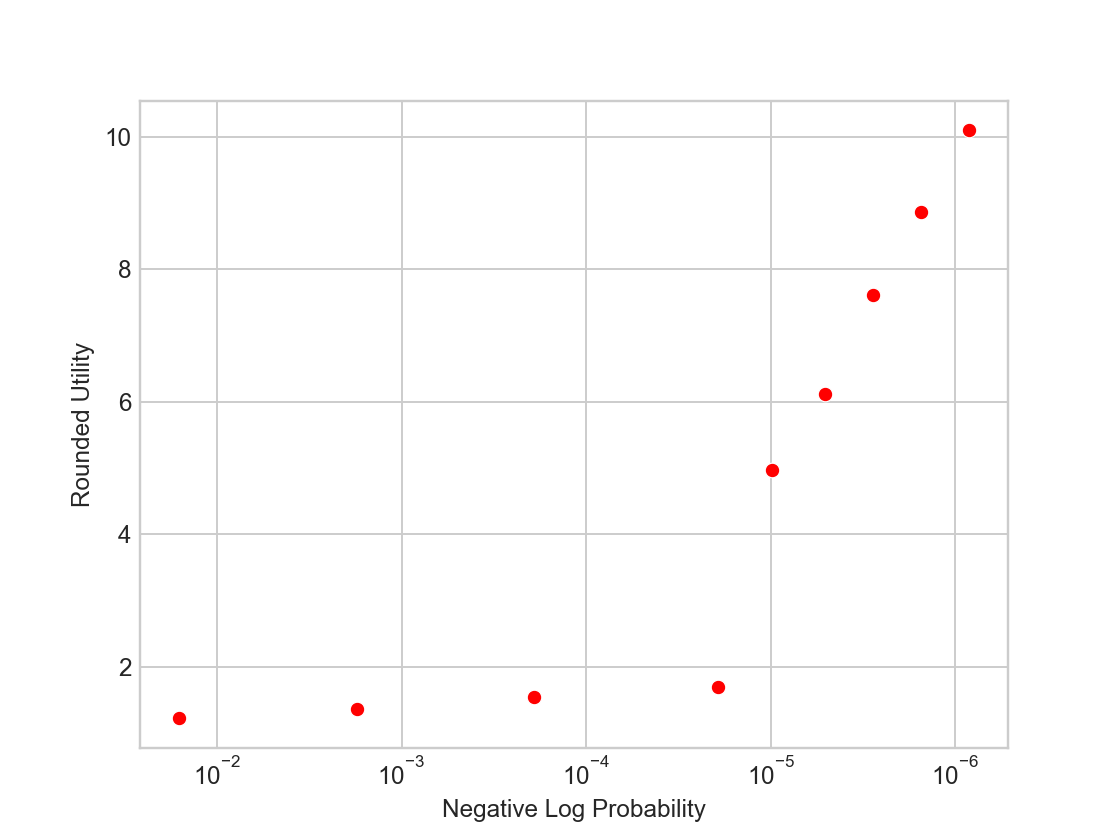

In [275]:
%matplotlib notebook
scatter = sns.scatterplot(max_utility.iloc[1:], x='neg_log_p', y='ru', color='r')
plt.xscale('log')
plt.xlabel('Negative Log Probability')
plt.ylabel('Rounded Utility')
plt.gca().invert_xaxis()
plt.show()

##### Now let's plot the case for n=10 only

Here we can see the utility is monotone.

,u,p,ru,err,bound,neg_log_p
m,,,,,,
1,2.243639,0.450000,2.244788,0.001149,0.112182,1.152003e+00
2,3.472696,0.697500,3.469783,0.002912,0.173635,5.197349e-01
3,4.677898,0.833625,4.676124,0.001774,0.233895,2.625296e-01
4,5.814055,0.913485,5.814064,0.000009,0.290703,1.305471e-01
5,6.939342,0.955877,6.939567,0.000225,0.346967,6.510258e-02
6,7.623349,0.995588,7.623574,0.000225,0.381167,6.379638e-03
7,8.271002,0.999515,8.270272,0.000729,0.413550,7.003808e-04
8,8.891523,0.999947,8.892097,0.000574,0.444576,7.702525e-05
9,9.499175,0.999994,9.501486,0.002311,0.474959,8.472576e-06


<IPython.core.display.Javascript object>


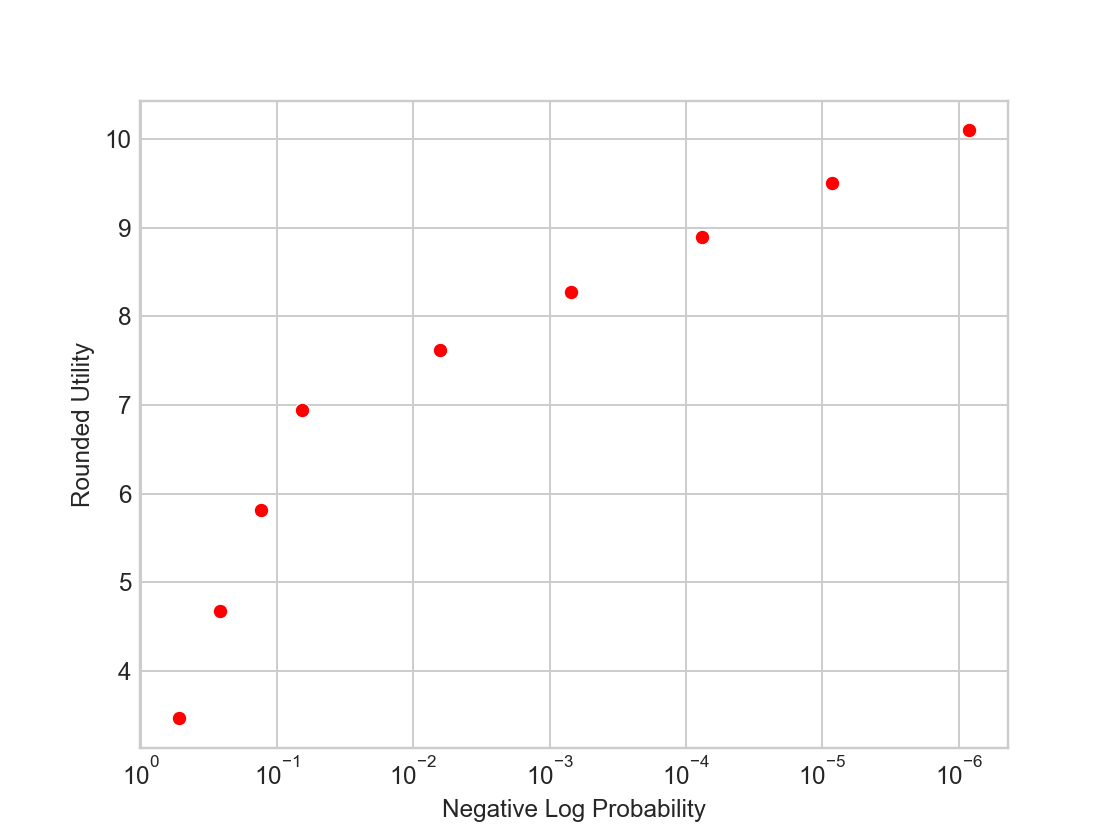

In [276]:
max_utility = data.loc[pd.IndexSlice[10, :]]
max_utility['bound'] = eps * max_utility.u
max_utility['neg_log_p'] = -np.log2(max_utility.p)
assert((max_utility.err <= max_utility.bound).all())
display(max_utility)
%matplotlib notebook
scatter = sns.scatterplot(max_utility.iloc[1:], x='neg_log_p', y='ru', color='r')
plt.xscale('log')
plt.xlabel('Negative Log Probability')
plt.ylabel('Rounded Utility')
plt.gca().invert_xaxis()
plt.show()